<a href="https://colab.research.google.com/github/ishangurtu/Ishan.cv/blob/master/NST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

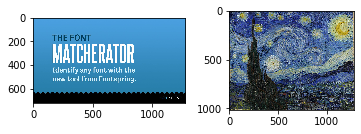

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


#Content = cv2.imread("Content2.jpg")
#Style = cv2.imread("Style2.jpg")
#A=cv2.cvtColor(Content, cv2.COLOR_BGR2RGB)
#B=cv2.cvtColor(Style, cv2.COLOR_BGR2RGB)
Content1 = cv2.imread("content.jpg")
Style1 = cv2.imread("style.jpg")
A1 = cv2.cvtColor(Content1, cv2.COLOR_BGR2RGB)
B1 = cv2.cvtColor(Style1, cv2.COLOR_BGR2RGB)

#plt.figure(1)
#plt.subplot(221)  #3 numbers, which are: height, width, plot number.
#plt.imshow(A)

#plt.subplot(232)
#plt.imshow(B)

plt.subplot(223)  #3 numbers, which are: height, width, plot number.
plt.imshow(A1)

plt.subplot(224)  #3 numbers, which are: height, width, plot number.
plt.imshow(B1)

plt.show()


  
  


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

     |████████████████████████████████| 79.9MB 50kB/s 
     |████████████████████████████████| 419kB 39.3MB/s 
     |████████████████████████████████| 3.0MB 38.8MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
import time
import functools

#Define a function to load an image and limit its maximum dimension to 512 pixels.

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_jpeg(img)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long = max(shape)
  scale = max_dim/long

  new_shape = tf.cast(shape*scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img
A = load_img("content.jpg")
B = load_img("style.jpg")
print(A)

tf.Tensor(
[[[[0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   ...
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]]

  [[0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   ...
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]]

  [[0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   ...
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]
   [0.28235295 0.627451   0.8745099 ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [ ]:
A = tf.keras.preprocessing.image.load_img("content.jpg", target_size=[224, 224])
A = load_img("content.jpg")
x = tf.keras.applications.vgg19.preprocess_input(A*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
r = vgg(x)
#tf.keras.applications.vgg19.decode_predictions
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
pretrained_model = tf.keras.applications.VGG19()
result_before_save = pretrained_model(x)
print()

decoded = imagenet_labels[np.argsort(result_before_save)[0,::-1][:5]+1]

print("Result before saving:\n", decoded)

16384/10484 [==============================================] - 0s 0us/step

Result before saving:
 ['web site' 'screen' 'cash machine' 'street sign' 'moving van']


In [ ]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)
  
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1',
                'block4_conv2',
                'block5_conv1',
                'block5_conv2',]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)  



def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. We load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model



B = load_img("style.jpg")
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(B*255)
#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

80142336/80134624 [==============================] - 2s 0us/step

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool
block1_conv1
  shape:  (1, 405, 512, 64)
  min:  0.0
  max:  674.46716
  mean:  24.261509

block2_conv1
  shape:  (1, 202, 256, 128)
  min:  0.0
  max:  2908.5833
  mean:  150.42699

block3_conv1
  shape:  (1, 101, 128, 256)
  min:  0.0
  max:  7352.798
  mean:  144.2811

block4_conv1
  shape:  (1, 50, 64, 512)
  min:  0.0
  max:  16498.193
  mean:  568.2347

block4_conv2
  shape:  (1, 50, 64, 512)
  min:  0.0
  max:  18160.299
  mean:  367.01468

block5_conv1
  shape:  (1, 25, 32, 512)
  min:  0.0
  max:  3951.405
  mean:  48.53021

block5_conv2
  shape:  (1, 25, 32, 512)
  min:  0.0
  max:  1698.3444
  mean:  18.946436



In [ ]:
#Calculate style
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)




In [ ]:

#Extract style and content
#Build a model that returns the style and content tensors.
class StyleContentModel(tf.keras.models.Model):
  

  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, input):
    "Expects float input in [0,1]"
    input = input*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(input)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}
  
#When called on an image, this model returns the gram matrix (style) of the style_layers and content of the content_layers:



In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(A))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0
    max:  52885.805
    mean:  1426.4055

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  204890.25
    mean:  26851.043

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  765389.56
    mean:  34917.664

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  16897088.0
    mean:  334375.12

   block4_conv2
    shape:  (1, 512, 512)
    min:  0.0
    max:  14610289.0
    mean:  123526.18

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  544822.25
    mean:  1213.6412

   block5_conv2
    shape:  (1, 512, 512)
    min:  0.0
    max:  56835.36
    mean:  215.4369

Contents:
   block5_conv2
    shape:  (1, 18, 32, 512)
    min:  0.0
    max:  898.03754
    mean:  12.875033


In [ ]:
#Run gradient descent
style_targets = extractor(B)['style']
content_targets = extractor(A)['content']

#Define a tf.Variable to contain the image to optimize. To make this quick, initialize it with the content image (the tf.Variable must be the same shape as the content image):

image = tf.Variable(A)


#Since this is a float image, define a function to keep the pixel values between 0 and 1:

def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

#Create an optimizer. The paper recommends LBFGS, but Adam works okay, too:

opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

#To optimize this, use a weighted combination of the two losses to get the total loss:

style_weight=1e-2
content_weight=1e4

In [ ]:
def style_content_loss(outputs, style_weight=1e-2, content_weight=1e4):
    opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight/num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight/num_content_layers
    loss = style_loss+content_loss
    return loss

#Use tf.GradientTape to update the image.
image = tf.Variable(A)

  


In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

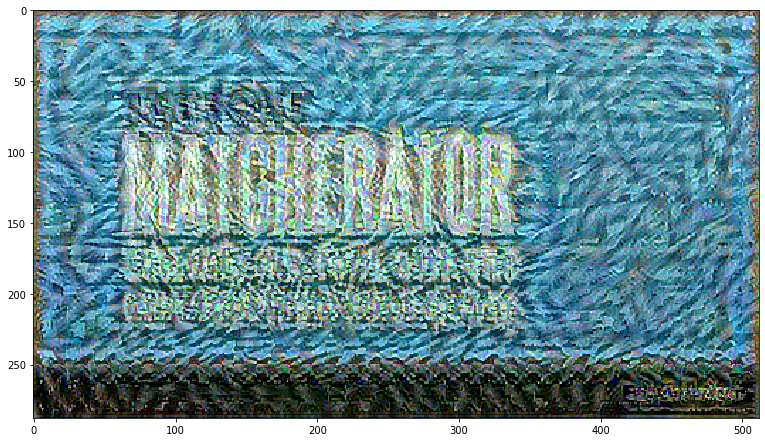

In [ ]:
for i in range(50):
  n = 40
  while n>=0:
    train_step(image)
    n-=1
    display.clear_output(wait=True)
    plt.imshow(image.read_value()[0])
    plt.show()
  a = str(input("Type 'YES' or 'NO' to continue or not:  "))
  if a == "YES":
    continue
  elif a == "NO":
    break
  else:
    print("Invalid input")
    continue
    
    
  




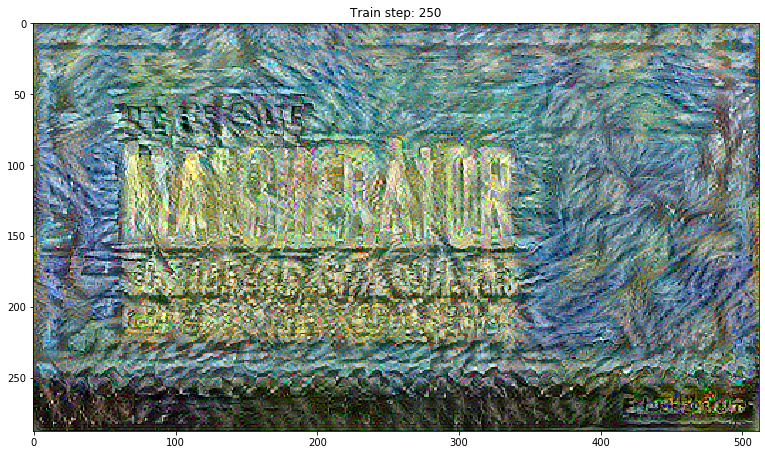

Total time: 1195.4


In [ ]:
import time
start = time.time()

epochs = 50
steps_per_epoch = 30

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  plt.imshow(image.read_value()[0])
  plt.title("Train step: {}".format(step))
  plt.show()
  

end = time.time()
print("Total time: {:.1f}".format(end-start))